<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Data visualization · <b>Workshop 4</b></p>
<p style="margin: 0; text-align:right;">Master's Degree in Data Science </p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Computer science, multimedia and telecommunications</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Workshop 4: Visualizacion creation and project delivery - Code

### **Author:** Josep Mª Espasa Verdés

### Table of contents

<ol start="1">
  <li>Data loading</li>
  <li>Data Munging</li>
  <li>Data exploration</li>
  <li>Radial Stacked Bar Charts data preparation</li>
  <li>Adding data from external sources</li>
</ol>

## 1. Data loading

In [1]:
# Imports llibraries needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Loads data and corpus information from csv downloaded from website (https://www.peaceagreements.org/list)
pax_df = pd.read_csv('data/in/pax_all_agreements_data_20191118.csv')
pax_corpus_df = pd.read_csv('data/in/pax_all_agreements_corpus.csv')

# Checks size dataframes
print(pax_df.shape)
print(pax_corpus_df.shape)

(1789, 266)
(1789, 12)


In [3]:
# Shows data head
pax_df.head()

,Con,Contp,PP,PPName,Reg,AgtId,Agt,Dat,Status,Lgt,...,TjRep,TjRSym,TjRMa,TjNR,ImUN,ImOth,ImRef,ImPK,ImE,ImSrc
0,Afghanistan,Government,2.0,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1739,Agreement between the Islamic Republic of Afgh...,2016-09-22,Multiparty signed/agreed,4,...,0,0,0,0,0,0,0,0,1,1
1,Afghanistan,Government,2.0,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1923,Agreement between the two campaign teams regar...,2014-09-21,Multiparty signed/agreed,4,...,0,0,0,0,1,1,0,0,0,1
2,Afghanistan,Government,2.0,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,864,Tokyo Declaration Partnership for Self-Relianc...,2012-07-08,Multiparty signed/agreed,14,...,0,0,0,1,0,0,0,0,1,1
3,Afghanistan,Government,2.0,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,848,Conclusions of the Conference on Afghanistan a...,2011-12-05,Multiparty signed/agreed,7,...,0,0,0,1,1,0,0,0,0,1
4,Afghanistan,Government,2.0,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,849,Istanbul Process on Regional Security and Coop...,2011-11-02,Multiparty signed/agreed,10,...,0,0,0,1,0,0,0,0,0,1


In [4]:
# Shows corpus head
pax_corpus_df.head()

,AgreementId,Name,Region,Country,Peace Process,Peace Process Name,Stage,Signed Date,Agreement/Conflict Level,Conflict Nature,Agreement Status,Agreement Text
0,1739,Agreement between the Islamic Republic of Afgh...,Europe and Eurasia,Afghanistan,2.0,Afghanistan: 2000s Post-intervention process,SubPar,2016-09-22,Intra,Government,Multiparty signed/agreed,Agreement Between Goira & Hezb-E-Islami Of Afg...
1,1923,Agreement between the two campaign teams regar...,Europe and Eurasia,Afghanistan,2.0,Afghanistan: 2000s Post-intervention process,Imp,2014-09-21,Intra,Government,Multiparty signed/agreed,Agreement between the Two Campaign Teams Regar...
2,864,Tokyo Declaration Partnership for Self-Relianc...,Europe and Eurasia,Afghanistan,2.0,Afghanistan: 2000s Post-intervention process,Imp,2012-07-08,InterIntra,Government,Multiparty signed/agreed,The Tokyo Declaration Partnership for Self-Rel...
3,848,Conclusions of the Conference on Afghanistan a...,Europe and Eurasia,Afghanistan,2.0,Afghanistan: 2000s Post-intervention process,Pre,2011-12-05,InterIntra,Government,Multiparty signed/agreed,The International Afghanistan Conference in Bo...
4,849,Istanbul Process on Regional Security and Coop...,Europe and Eurasia,Afghanistan,2.0,Afghanistan: 2000s Post-intervention process,Imp,2011-11-02,InterIntra,Government,Multiparty signed/agreed,Istanbul Process on Regional Security and Coop...


In [5]:
# Shows data basic information
pax_df.describe()

,PP,AgtId,Lgt,N_characters,Loc1GWNO,Loc2GWNO,UcdpAgr,PamAgr,CowWar,GCh,...,TjRep,TjRSym,TjRMa,TjNR,ImUN,ImOth,ImRef,ImPK,ImE,ImSrc
count,1782.000000,1789.000000,1789.000000,1789.000000,1769.000000,232.000000,2.970000e+02,33.000000,1111.000000,1789.000000,...,1789.000000,1789.000000,1789.000000,1789.000000,1789.000000,1789.000000,1789.000000,1789.000000,1789.000000,1789.000000
mean,89.603255,1106.604807,6.359978,11959.409726,528.292256,439.159483,2.903701e+10,17.272727,760.739874,0.313583,...,0.174958,0.010620,0.101174,0.295137,0.199553,0.241476,0.010061,0.294019,0.389603,0.999441
std,47.323516,635.813541,17.493402,37567.806638,227.494776,197.221974,3.602522e+11,10.022702,253.699787,0.773252,...,0.550695,0.102536,0.301643,0.603943,0.399776,0.428098,0.099829,0.455728,0.487797,0.023643
min,1.000000,1.000000,1.000000,0.000000,41.000000,2.000000,2.400000e+01,1.000000,139.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,547.000000,1.000000,2389.000000,359.000000,345.000000,1.107000e+03,9.000000,817.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,94.000000,1089.000000,2.000000,4362.000000,540.000000,371.000000,1.334000e+03,17.000000,857.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,120.000000,1671.000000,5.000000,9443.000000,678.000000,625.000000,1.523000e+03,26.000000,905.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,203.000000,2231.000000,323.000000,908459.000000,940.000000,770.000000,5.171991e+12,34.000000,941.000000,3.000000,...,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Shows corpus basic information
pax_corpus_df.describe()

,AgreementId,Peace Process
count,1789.000000,1782.000000
mean,1106.604807,89.603255
std,635.813541,47.323516
min,1.000000,1.000000
25%,547.000000,51.000000
50%,1089.000000,94.000000
75%,1671.000000,120.000000
max,2231.000000,203.000000


In [7]:
# Shows corpus column types
pax_df.dtypes

Con        object
Contp      object
PP        float64
PPName     object
Reg        object
           ...   
ImOth       int64
ImRef       int64
ImPK        int64
ImE         int64
ImSrc       int64
Length: 266, dtype: object

In [8]:
# Shows corpus column types
pax_corpus_df.dtypes

AgreementId                   int64
Name                         object
Region                       object
Country                      object
Peace Process               float64
Peace Process Name           object
Stage                        object
Signed Date                  object
Agreement/Conflict Level     object
Conflict Nature              object
Agreement Status             object
Agreement Text               object
dtype: object

## 2. Data Munging

In [9]:
# Adds year column
pax_df['Year'] = pax_df['Dat'].apply(lambda x: int(x.split('-')[0]))

In [10]:
# Replaces '/' character used in other places than for countries divider
pax_df['Con'] = pax_df['Con'].map(lambda x: x.replace('RPMP/RPA/ABB', 'RPMP-RPA-ABB'))

In [11]:
# Converts multiple Countries/Regions in multiples rows adding a new col (UniqCon) of one country name
pax_con_df = pd.DataFrame({col:np.repeat(pax_df[col].values, pax_df['Con'].str.split('/').str.len()) 
                                for col in pax_df.columns}
                         ).assign(**{'UniqCon':np.concatenate(pax_df['Con'].str.split('/'))})

In [12]:
# Safe original region as new column
pax_con_df['Reg_or'] = pax_con_df['Reg']

In [13]:
# Replaces (Country) with Country in order to summarize it correctly
pax_con_df['UniqCon'] = pax_con_df['UniqCon'].map(lambda x: x[1:-1] if x[0]+x[-1]=='()' else x)

In [14]:
def search_region (row):
    """
    Looks for not a 'Cros-regional' region in other dataframe rows for the same country and returns this region 
    
    Arguments -> a row with two elements:
                    row[0], country
                    row[0], region
        
     Returns -> region or 'NA' if not founded
    """
    if row[1]=='Cross-regional':
        if pax_con_df[(pax_con_df['UniqCon']==row[0])&(pax_con_df['Reg']!='Cross-regional')]['Reg'].shape[0]>0:
            region = pax_con_df[(pax_con_df['UniqCon']==row[0])&(pax_con_df['Reg']!='Cross-regional')]['Reg'].iloc[0]
        else:
            region = 'NA'
    else:
        region = row[1]
    return region

In [15]:
# Tries to replace 'Cross-regional' regions using search_region
pax_con_df['Reg'] = pax_con_df[['UniqCon', 'Reg']].apply(search_region, axis=1)

In [16]:
# Shows countries not founded that need to be set region
pax_con_df[pax_con_df['Reg']=='NA']['UniqCon'].value_counts()

Taliban                     6
United States of America    6
Kurds-Kurdistan             3
Mongolia                    3
United Nations              3
Kazakhstan                  2
Argentina                   2
Kyrgyzstan                  1
Turkey                      1
Japan                       1
Portugal                    1
Germany                     1
France                      1
Name: UniqCon, dtype: int64

In [17]:
# Dict with Country and Region needed
region_dict = {'United States of America': 'Americas', 
               'Taliban':'Europe and Eurasia', 
               'Kurds-Kurdistan':'Middle East and North Africa',
               'United Nations':'Other',
               'Mongolia': 'Europe and Eurasia',
               'Kazakhstan': 'Europe and Eurasia',
               'Argentina': 'Americas',
               'Portugal': 'Europe and Eurasia',
               'Kyrgyzstan': 'Europe and Eurasia',
               'Turkey': 'Europe and Eurasia',
               'Germany': 'Europe and Eurasia',
               'France': 'Europe and Eurasia',
               'Japan': 'Asia and Pacific'
              }

In [18]:
# Replaces 'NA' regions with dictionary value
pax_con_df['Reg'] = pax_con_df[['UniqCon', 'Reg']].apply(lambda x: region_dict[x[0]] if x[1]=='NA' else x[1], axis=1)

In [19]:
# Aggregates peace agreements by country, region typology (original value) and year
pax_con_year = pax_con_df.groupby(['UniqCon', 'Reg_or', 'Year'])['AgtId'].agg('count').to_frame('Value')

# Adds year column from index label
pax_con_year['Year'] = pax_con_year.index.get_level_values('Year')

# Adds region column from index label
pax_con_year['Reg_or'] = pax_con_year.index.get_level_values('Reg_or')

# Adds country column from index label
pax_con_year['Country'] = pax_con_year.index.get_level_values('UniqCon')

# Reorders columns
pax_con_year = pax_con_year[['Country', 'Reg_or', 'Year', 'Value']]

# Exports to CSV
pax_con_year.to_csv(path_or_buf='data/out/countries_reg_years.csv', 
                    header=['Country','Region', 'Year', 'Value'], index=False)

In [20]:
# Searches countries with most peace agreements
pax_con_df['UniqCon'].value_counts()

Yugoslavia (former)       208
Philippines               158
Bosnia and Herzegovina    133
Colombia                  129
Mindanao                  126
                         ... 
Venezuela                   1
Bangladesh                  1
Macedonia                   1
Terekeka                    1
Assam                       1
Name: UniqCon, Length: 151, dtype: int64

In [21]:
# Searches Colombia peace agreements per year and exports it to CSV
pax_con_df[pax_con_df['UniqCon']=='Colombia']['Year'].value_counts()\
        .to_csv(path_or_buf='data/out/colombia_agreements.csv', header=['Count'], index_label='Year')    

## 3. Data exploration

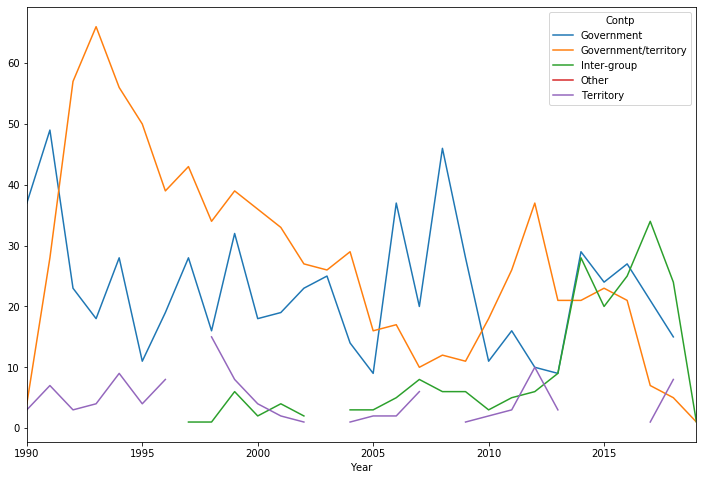

In [22]:
pax_df[['Contp','Year','AgtId']].groupby(['Contp','Year']).agg('count')\
    .pivot_table('AgtId', index='Year', columns='Contp').plot(figsize=(12,8));

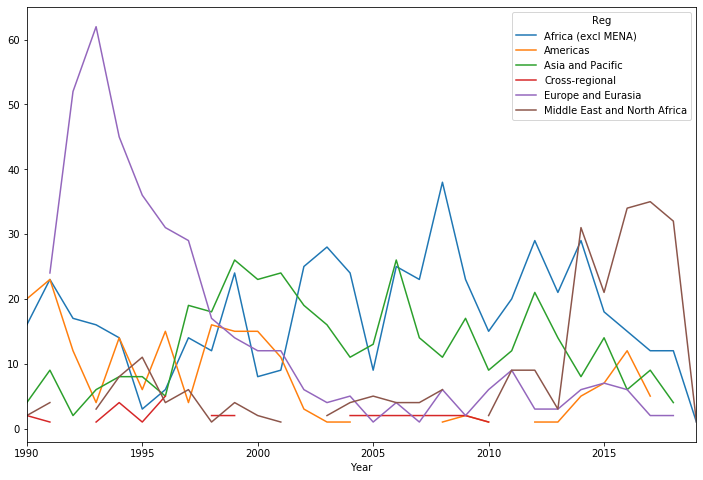

In [23]:
pax_df[['Reg','Year','AgtId']].groupby(['Reg','Year']).agg('count')\
    .pivot_table('AgtId', index='Year', columns='Reg').plot(figsize=(12,8));

### Countries/Regions in PA-X

In [24]:
# Shows Countries and Regions conflict for all years
(pax_con_df.groupby('UniqCon')['Reg'].agg(Reg= 'last', Count= 'count')
                .to_csv(path_or_buf='data/out/countries.csv', header=['Region', 'Count'], index_label='Countries'))

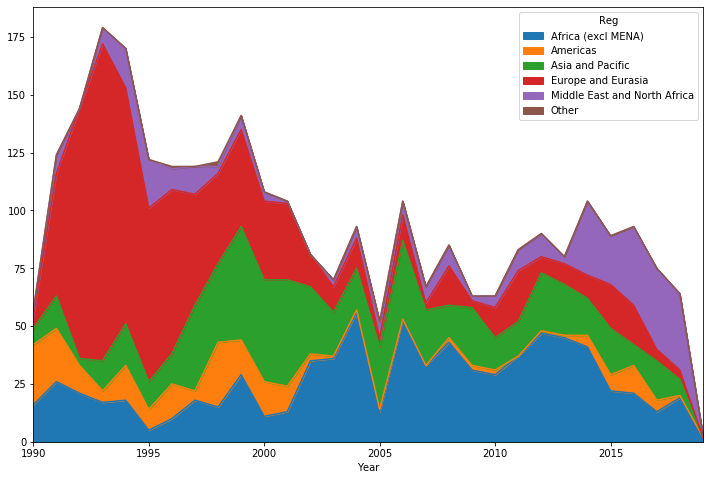

In [25]:
pax_con_df.groupby(['Year', 'Reg'])['Reg'].agg(Count= 'count')\
     .pivot_table('Count', index='Year', columns='Reg').plot(kind='area',figsize=(12,8));

In [26]:
# Shows Countries and Regions conflict a year
years = [1990, 2018]

for year in years:

    (pax_con_df[pax_con_df['Year']==year].groupby('UniqCon')['Reg']
        .agg(Count= 'count', Reg= 'last').to_csv(path_or_buf='data/out/countries_{}.csv'.format(year),
                                                 header=['Count', 'Region'], index_label='Countries'))

### Evolution study

In [27]:
# Calculates conflict types for each year
(pax_df.groupby(['Year', 'Contp'])['Year']
    .count().to_csv(path_or_buf='data/out/conflict_types.csv', header=['Count'], index_label=['Year', 'Conflict_type']))

In [28]:
# Calculates total agreements per year
group_yr_df = pd.DataFrame({'Total' : pax_df.groupby(['Year'])['Year'].count()}) 

# Calculates groups anti-discrimination and substantive references in percentage per year
group_cols = ['GCh', 'GDis', 'GAge', 'GMig', 'GRa', 'GRe', 'GInd', 'GOth', 'GRef']

for group_col in group_cols:
    group_yr_df[group_col] = pd.Series((pax_df[pax_df[group_col]>=2]
                                        .groupby(['Year'])['Year'].count()*100/group_yr_df['Total']).fillna(0))

In [29]:
# Calculates gender references in percentage per year and adds it as new columns in group_yr_df
gender_cols = ['GeWom', 'GeMe', 'GeSo', 'GeFa']

for gender_col in gender_cols:
    group_yr_df[gender_col] = pd.Series((pax_df[pax_df[gender_col]==1]\
                                        .groupby(['Year'])['Year'].count()*100/group_yr_df['Total']).fillna(0))

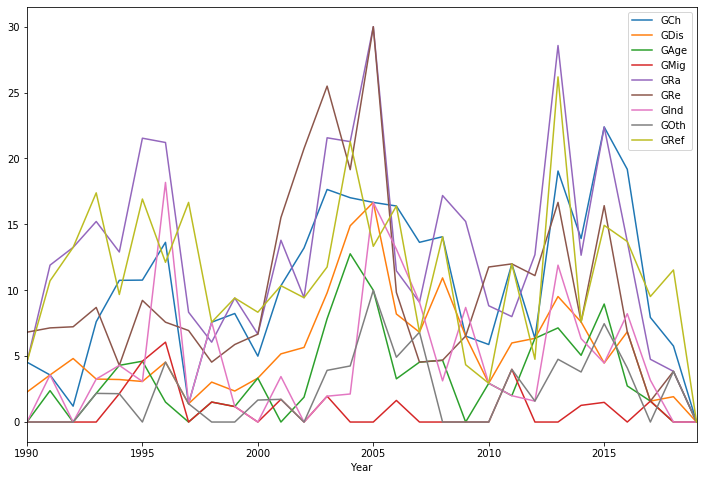

In [30]:
group_yr_df[group_cols].plot(figsize=(12,8));

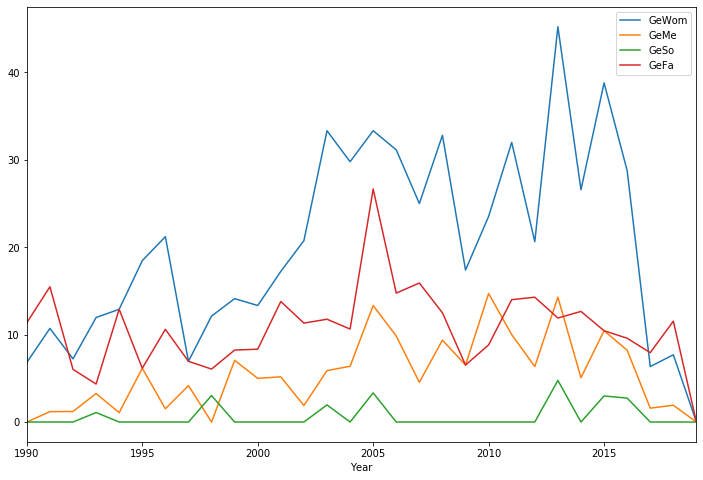

In [31]:
group_yr_df[gender_cols].plot(figsize=(12,8));

## 4. Radial Stacked Bar Charts data preparation

In [32]:
# Aggregates conflict type for each year adding zeros where needed
radial_conf_df = pax_df.groupby(['Year', 'Contp'])['Year'].count().unstack(fill_value=0).stack().to_frame('Contp_count')

# Exports to csv file
radial_conf_df.to_csv(
    path_or_buf='data/out/conflict_types_radial.csv',
    header=['Contp_count'],
    index_label=['Year', 'Conflict_type'])

In [33]:
# For each value we need 2 rows (1 and 5 PathOrder)
radial_conf_df = radial_conf_df.append([radial_conf_df]).sort_index()

radial_conf_df['PathOrder'] = np.concatenate([[1, 5]*int(radial_conf_df.shape[0]/2)])

# Exports to csv file
radial_conf_df.to_csv(
    path_or_buf='data/out/conflict_types_radial_15.csv',
    header=['Contp_count', 'PathOrder'],
    index_label=['Year', 'Conflict_type'])

In [34]:
# Aggregates region for each year adding zeros where needed
radial_reg_df = pax_df.groupby(['Year', 'Reg'])['Year'].count().unstack(fill_value=0).stack().to_frame('Reg_count')

# Exports to csv file
radial_reg_df.to_csv(
    path_or_buf='data/out/region_radial.csv',
    header=['Reg_count'],
    index_label=['Year', 'Region'])

# For each value we need 2 rows (1 and 5 PathOrder)
radial_reg_df = radial_reg_df.append([radial_reg_df]).sort_index()

radial_reg_df['PathOrder'] = np.concatenate([[1 ,5]*int(radial_reg_df.shape[0]/2)])

# Exports to csv file
radial_reg_df.to_csv(
    path_or_buf='data/out/region_radial_15.csv',
    header=['Reg_count', 'PathOrder'],
    index_label=['Year', 'Region'])

## 5. Adding data from external sources

### GPD Growth Index

In [35]:
gpd_df = pd.read_csv('data/in/WorldBank/25a91ec8-00d8-47a8-948c-61a7a354a69a_Data.csv')

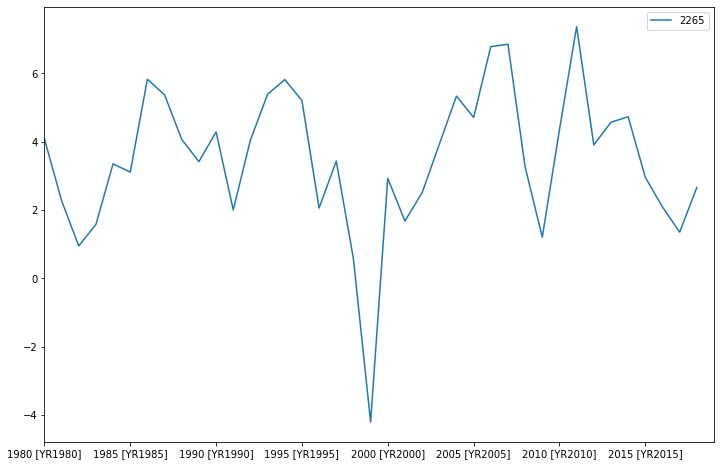

In [36]:
gpd_df[(gpd_df['Country Name']=='Colombia')&(gpd_df['Series Code']=='NY.GDP.MKTP.KD.ZG')].T.iloc[4:].plot(figsize=(12,8));

In [37]:
# Select serie and values needed
colombia_gdp = gpd_df[(gpd_df['Country Name']=='Colombia')&(gpd_df['Series Code']=='NY.GDP.MKTP.KD.ZG')]\
    .T.iloc[4:].dropna()

In [38]:
# Redefine indexs
colombia_gdp.index = [row.split()[0] for row in colombia_gdp.index]

# Defines column name
colombia_gdp.columns = ['Value']

# Adds year column from index label
colombia_gdp['Year'] = colombia_gdp.index

# Adds field meaning
colombia_gdp['Field'] = 'Colombia_gdp'

In [39]:
# Reads country-region list file
country_list = pd.read_excel('data/in/WorldBank/Country_class.xls', sheet_name='List of economies',
                             header=4, usecols=[2, 5], nrows=219).drop(0)

# Finds country region
region = country_list[country_list['Economy']=='Colombia']['Region'].iloc[0]

# Finds list of countries in specific region
countries_region =country_list[country_list['Region']==region]['Economy']

# Calculates average index in region
region_gdp = gpd_df[gpd_df['Country Name'].isin(countries_region)&(gpd_df['Series Code']=='NY.GDP.MKTP.KD.ZG')]\
        .mean().dropna()

# Redefine index 
region_gdp.index = [row.split()[0] for row in region_gdp.index]

# Converts to dataframe
region_gdp = region_gdp.to_frame('Value')

# Adds year columns from index label
region_gdp['Year'] = region_gdp.index

# Adds field meaning
region_gdp['Field'] = 'Region_gdp'

# Concatenate two dataframes
colombia_gdp = pd.concat([colombia_gdp, region_gdp], ignore_index=True, sort=True)

In [40]:
# Exports to CSV
colombia_gdp.to_csv(path_or_buf='data/out/colombia_reg_GDP.csv', 
                    header=['Field','Value', 'Year'], index=False)

### Human Development Index (HDI)

In [41]:
# Imports data information from xls downloaded from website (http://hdr.undp.org/en/content/human-development-index-hdi)
hdi_df = pd.read_excel('data/in/HDI_2018_all_indicators.xlsx', sheet_name='Data', usecols=[4, 31, 32], nrows=189)

hdi_df.columns = ['Country', 'HDI_2016', 'HDI_2017']

In [42]:
# Imports data information from xls downloaded from website (http://hdr.undp.org/en/content/human-development-index-hdi)
hdi_full = pd.read_excel('data/in/HDI_2018_all_indicators.xlsx', sheet_name='Data')

In [43]:
hdi_full.head()

,dimension,indicator_id,indicator_name,iso3,country_name,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,9999
0,Composite indices,146206,HDI rank,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,168.0,NaN
1,Composite indices,146206,HDI rank,ALB,Albania,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,68.0,NaN
2,Composite indices,146206,HDI rank,DZA,Algeria,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,85.0,NaN
3,Composite indices,146206,HDI rank,AND,Andorra,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,35.0,NaN
4,Composite indices,146206,HDI rank,AGO,Angola,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,147.0,NaN


In [44]:
# Selects HDI index for all countries
hdi_world = hdi_full[hdi_full['indicator_name']=='Human Development Index (HDI)'].iloc[:,4:-1]

In [45]:
hdi_world.head()

,country_name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
189,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.437,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498
190,Albania,0.645,0.626,0.610,0.613,0.619,0.632,0.641,0.641,0.652,...,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785
191,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.608,0.617,0.627,...,0.709,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.752,0.754
192,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.831,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858
193,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.502,0.522,0.520,0.534,0.543,0.554,0.564,0.572,0.577,0.581


In [46]:
# Selects Colombia HDI index
colombia_hdi = hdi_world[hdi_world['country_name']=='Colombia'].iloc[:,1:].T

# Defines column name
colombia_hdi.columns = ['Value']

# Adds year column from index label
colombia_hdi['Year'] = colombia_hdi.index

# Adds field meaning
colombia_hdi['Field'] = 'Colombia_hdi'

In [47]:
# Calculates average index in region
region_hdi = hdi_world[hdi_world['country_name'].isin(countries_region)].mean().dropna()

# Converts to dataframe
region_hdi = region_hdi.to_frame('Value')

# Adds year columns from index label
region_hdi['Year'] = region_hdi.index

# Adds field meaning
region_hdi['Field'] = 'Region_hdi'

# Concatenate two dataframes
colombia_hdi = pd.concat([colombia_hdi, region_hdi], ignore_index=True, sort=True)

In [48]:
# Exports to CSV
colombia_hdi.to_csv(path_or_buf='data/out/colombia_reg_HDI.csv', 
                    header=['Field','Value', 'Year'], index=False)

### Life Expectacy at Birth (LEB)

In [49]:
# Select serie and values needed
colombia_leb = gpd_df[(gpd_df['Country Name']=='Colombia')&(gpd_df['Series Code']=='SP.DYN.LE00.IN')]\
    .T.iloc[4:].dropna()

# Redefine indexs
colombia_leb.index = [row.split()[0] for row in colombia_leb.index]

# Defines column name
colombia_leb.columns = ['Value']

# Adds year column from index label
colombia_leb['Year'] = colombia_leb.index

# Adds field meaning
colombia_leb['Field'] = 'Colombia_leb'

In [50]:
# Calculates average index in region
region_leb = gpd_df[gpd_df['Country Name'].isin(countries_region)&(gpd_df['Series Code']=='SP.DYN.LE00.IN')]\
        .mean().dropna()

# Redefine index 
region_leb.index = [row.split()[0] for row in region_leb.index]

# Converts to dataframe
region_leb = region_leb.to_frame('Value')

# Adds year columns from index label
region_leb['Year'] = region_leb.index

# Adds field meaning
region_leb['Field'] = 'Region_leb'

# Concatenate two dataframes
colombia_leb = pd.concat([colombia_leb, region_leb], ignore_index=True, sort=True)

In [51]:
# Exports to CSV
colombia_leb.to_csv(path_or_buf='data/out/colombia_reg_LEB.csv', 
                    header=['Field','Value', 'Year'], index=False)

### School enrollment index (SCI)

In [52]:
# Select series and values needed
school_series = ['SE.PRM.NENR', 'SE.SEC.NENR']

colombia_sci = gpd_df[(gpd_df['Country Name']=='Colombia')&gpd_df['Series Code'].isin(school_series)].mean()\
    .T.iloc[4:].dropna()

# Redefine indexs
colombia_sci.index = [row.split()[0] for row in colombia_sci.index]

# Converts to dataframe
colombia_sci = colombia_sci.to_frame('Value')

# Defines column name
colombia_sci.columns = ['Value']

# Adds year column from index label
colombia_sci['Year'] = colombia_sci.index

# Adds field meaning
colombia_sci['Field'] = 'Colombia_sci'

In [53]:
# Calculates average index in region
region_sci = gpd_df[gpd_df['Country Name'].isin(countries_region)&gpd_df['Series Code'].isin(school_series)]\
        .mean().dropna()

# Redefine index 
region_sci.index = [row.split()[0] for row in region_sci.index]

# Converts to dataframe
region_sci = region_sci.to_frame('Value')

# Adds year columns from index label
region_sci['Year'] = region_sci.index

# Adds field meaning
region_sci['Field'] = 'Region_sci'

# Concatenate two dataframes
colombia_sci = pd.concat([colombia_sci, region_sci], ignore_index=True, sort=True)

In [54]:
# Exports to CSV
colombia_sci.to_csv(path_or_buf='data/out/colombia_reg_SCI.csv', 
                    header=['Field','Value', 'Year'], index=False)